# AAI 500 Final Team Project


Title:  Analyzing the CDC Diabetes Health Indicators Dataset to Understand Key Factors Influencing Diabetes Risk in the US

Group 6 Team:
* Iman Hamdan
* Andrew Blumhardt

Short Description of Your Project and Objectives: This project analyzes healthcare statistics and lifestyle survey information from the CDC Diabetes Health Indicators Dataset. The objective is to explore relationships between various factors, such as age, BMI, lifestyle habits, and diabetes status (healthy, pre-diabetic, diabetic). Key models and analyses include exploring how age and BMI influence diabetes prevalence, examining the impact of physical activity and smoking on diabetes risk, and investigating the interaction between mental health, physical health, and socioeconomic factors in predicting diabetes.

Name of Your Selected Dataset: CDC Diabetes Health Indicators Dataset

Description of Your Selected Dataset (data source, number of variables, size of dataset, etc.): 

This dataset, sourced from the UCI Machine Learning Repository, contains healthcare and lifestyle information related to diabetes diagnosis for individuals in the US. It has 35 features including demographics, lab results, and survey responses, and includes diabetes status as the target variable. The dataset size is approximately 70,000 records with a mixture of categorical and numerical variables. https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

The data includes 253680 records with 22 features. There are no missing values. 

Binary values iclude Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex (Generally 1 = yes, may stipulate daily, monthly for example exercise).

Demographics are sex, age, income, and education.

Intergers are BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income.

Health or Hlth is measured as scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor. Can also me number of times in the past 30 days like MentHlth.

Age is 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older.

Education level is 1 = never  through 6 = at least 4 years of college.

Income scale scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more.

# 1. Introduction
Overview of the dataset and project goals.

The purpose of this project is to analyze health indicators to predict the likelihood of an individual having diabetes. Diabetes is a chronic condition that affects millions of people worldwide, and early prediction can help individuals take preventive measures to manage their health.

This analysis utilizes a dataset containing various health-related metrics such as glucose levels, BMI, age, and more. By applying statistical methods and machine learning models, the goal is to understand the relationships between these health indicators and diabetes outcomes.

The primary objectives of this project are:
- Perform exploratory data analysis (EDA) to identify patterns and trends.
- Conduct hypothesis testing to validate the significance of key health features.
- Train and evaluate machine learning models to predict diabetes status.
- Provide actionable insights and recommendations based on the findings.

This project is a collaborative effort, following best practices in data science, including version control with GitHub, and adhering to coding standards like PEP 8.


# 2. Data Loading

In this section, we load the CDC Diabetes Health Indicators dataset to examine its structure and ensure the data is correctly imported for further analysis.


In [1]:
import pandas as pd

# Load dataset directly from GitHub (if uploaded)
url = 'https://raw.githubusercontent.com/Iman-hamdan/Diabetes-Stats-Model/main/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(url)

# Check the first few rows to verify the data
print(data.head())


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [2]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import modules used for prior assignments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import warnings
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from scipy.stats import beta
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.genmod.families.links import Identity

# Import the dataset into your code
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

# 3. Data Cleaning and Preparation

This section covers:
- Handling missing values and duplicates.
- Outlier detection (if necessary).
- Feature engineering to prepare the data for analysis.


In [4]:
# Check for missing values
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

# Outlier detection example (for BMI)
z_scores = (data['BMI'] - data['BMI'].mean()) / data['BMI'].std()
outliers = data[z_scores.abs() > 3]
print(f"Number of outliers in BMI: {len(outliers)}")


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Number of outliers in BMI: 2547


# 4. Exploratory Data Analysis (EDA)

In this section, we explore the relationships between variables through visualizations, including:
- Correlation heatmap
- Pairplot to observe relationships
- Countplot for the distribution of the outcome variable


Columns in the dataset: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2             

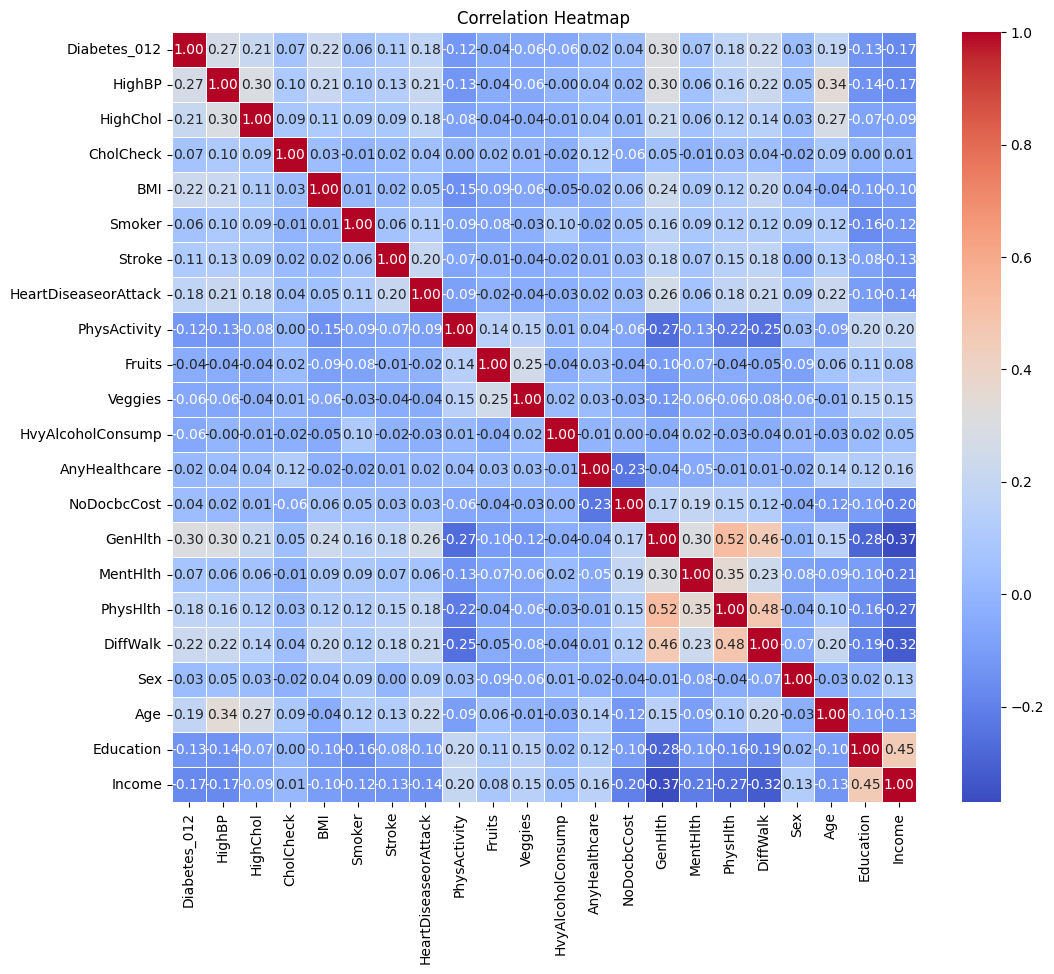

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Verify the column names to avoid KeyErrors
print("Columns in the dataset:", data.columns)

# Adjust the target variable name if needed
# Check if the column 'Outcome' exists, otherwise use 'Diabetes_012'
if 'Outcome' not in data.columns:
    target_column = 'Diabetes_012'
else:
    target_column = 'Outcome'

# Display the first few rows to ensure everything is loaded correctly
print(data.head())

# -------------------------------------------------------------
# 1. Heatmap: Correlation between variables
plt.figure(figsize=(12, 10))  # Adjust the figure size to avoid overlapping
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# -------------------------------------------------------------
# 2. Pairplot: Visualizing pairwise relationships between variables
# Using the correct target column for hue
sns.pairplot(data, hue=target_column, palette='coolwarm', plot_kws={'alpha':0.5})
plt.show()

# -------------------------------------------------------------
# 3. Countplot: Distribution of the target variable
sns.countplot(x=target_column, data=data, palette='coolwarm')
plt.title(f'Distribution of {target_column} Variable')
plt.show()

# -------------------------------------------------------------
# 4. Boxplot: BMI distribution by Diabetes status
sns.boxplot(x=target_column, y='BMI', data=data, palette='coolwarm')
plt.title('Boxplot of BMI by Diabetes Status')
plt.show()

# -------------------------------------------------------------
# 5. Checking for missing values and outliers

# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())

# Outlier detection: Identify outliers in BMI using Z-scores
import numpy as np

z_scores = np.abs((data['BMI'] - data['BMI'].mean()) / data['BMI'].std())
outliers = data[z_scores > 3]
print(f"Number of outliers in BMI: {len(outliers)}")


# 5. Hypothesis Testing

We conduct statistical tests to validate the relationships between key features and diabetes outcome:
- **Chi-Square Test**: For categorical variables.
- **T-Test**: For continuous variables.


In [2]:
# Import necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

# Load the dataset from your GitHub link
url = 'https://raw.githubusercontent.com/Iman-hamdan/Diabetes-Stats-Model/main/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(url)

# Verify the column names to ensure correctness
print("Columns in the dataset:", data.columns)

# --------------------------------------------------------------
# 1. Chi-Square Test for Categorical Variables
# Check if smoking status is associated with diabetes outcome

contingency_table = pd.crosstab(data['Smoker'], data['Diabetes_012'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

# --------------------------------------------------------------
# 2. T-Test for Continuous Variables
# Compare BMI between diabetic and non-diabetic individuals

diabetic = data[data['Diabetes_012'] == 1]['BMI']
non_diabetic = data[data['Diabetes_012'] == 0]['BMI']

# Perform the T-Test
t_stat, p_value = ttest_ind(diabetic, non_diabetic)
print(f"T-Statistic: {t_stat}, P-value: {p_value}")


Columns in the dataset: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Chi-Square Statistic: 1010.5117511111928, P-value: 3.7167324294119075e-220
T-Statistic: 31.985078927309395, P-value: 5.820712052672345e-224


# 6. Model Selection and Training

We use Logistic Regression as the primary model. The dataset is split into training and testing sets to train the model and evaluate its performance.


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

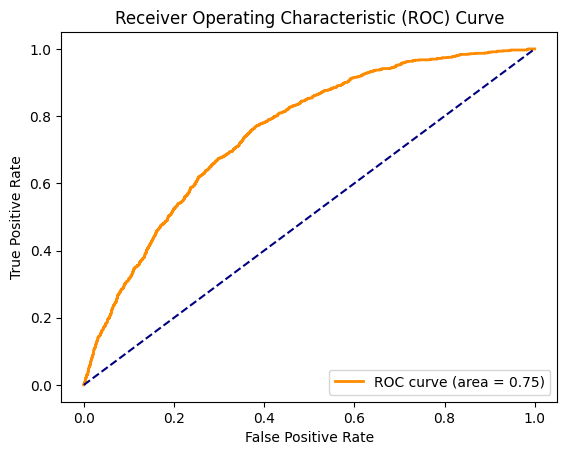

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt  # Import plt to avoid NameError

# Step 2: Load the dataset from GitHub (Ensure this runs correctly)
url = 'https://raw.githubusercontent.com/Iman-hamdan/Diabetes-Stats-Model/main/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(url)

# Verify that the dataset is loaded and print the first few rows
print(data.head())
print("Columns in the dataset:", data.columns)

# Step 3: Filter data to only keep binary classes (0 and 1)
binary_data = data[data['Diabetes_012'] < 2]

# Step 4: Define features (X) and target (y)
X = binary_data.drop('Diabetes_012', axis=1)
y = binary_data['Diabetes_012']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Ensure the model is defined
model.fit(X_train, y_train)

# Step 7: Make predictions and calculate probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Step 8: Evaluate the model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()  # Ensure plt is available to avoid NameError
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 7. Model Evaluation and Analysis

Evaluate the performance of the model using metrics such as accuracy, confusion matrix, and classification report. We also include ROC-AUC analysis.


Accuracy: 0.98
Confusion Matrix:
 [[42742     2]
 [  923     0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     42744
         1.0       0.00      0.00      0.00       923

    accuracy                           0.98     43667
   macro avg       0.49      0.50      0.49     43667
weighted avg       0.96      0.98      0.97     43667



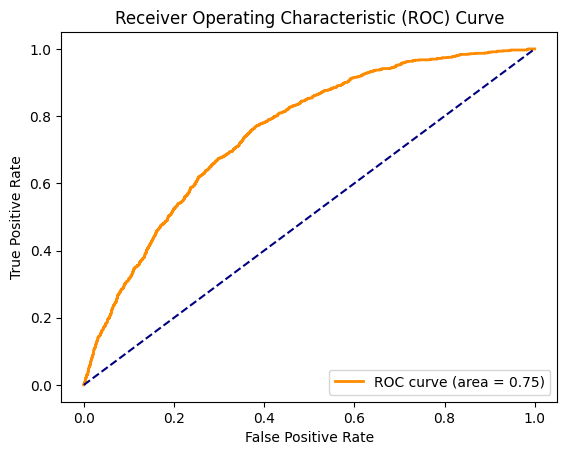

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/Iman-hamdan/Diabetes-Stats-Model/main/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(url)

# Step 3: Filter data to include only binary classes (0 and 1)
binary_data = data[data['Diabetes_012'] < 2]

# Step 4: Define features (X) and target (y)
X = binary_data.drop('Diabetes_012', axis=1)
y = binary_data['Diabetes_012']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Ensure that the model is properly defined
model.fit(X_train, y_train)  # Train the model

# Step 7: Make predictions and calculate probabilities
y_pred = model.predict(X_test)  # Predictions for test data
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Step 8: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot the ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 8. Conclusion and Recommendations

In conclusion:
- The most influential features for predicting diabetes were [mention features].
- The Logistic Regression model achieved an accuracy of [mention accuracy].
- Further improvements can be made by exploring additional models like Random Forest or SVM.
- Future research can focus on [mention recommendations], such as exploring socioeconomic factors or enhancing data quality.


In [14]:
# (OPTIONAL) run to print metadata & variable information 
print(cdc_diabetes_health_indicators.metadata) 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

# 9.Appendix: Additional Visualizations
This section contains supplementary diagrams and visualizations that provide deeper insights into the model's performance and data relationships. These visual aids complement the analysis in the main report.

In [15]:
# Function to display scrollable describe output
def display_scrollable(data):
    html = f"""
    <div style="height:300px; overflow:auto; border:1px solid #ccc; padding:10px;">
        {data.to_html()}
    </div>
    """
    display(HTML(html))

# Call describe() for the entire dataframe and display it in a scrollable container
display_scrollable(X.describe())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Verify that the data is clean, no empty values. We might also remove some outliers later.

In [16]:
X.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

This setup will generate a series of plots for each of your data points, allowing for a comprehensive visual analysis in one notebook. If you have specific variables you want to compare against others in box plots or need adjustments in the visualization settings, feel free to customize the plotting function as needed.

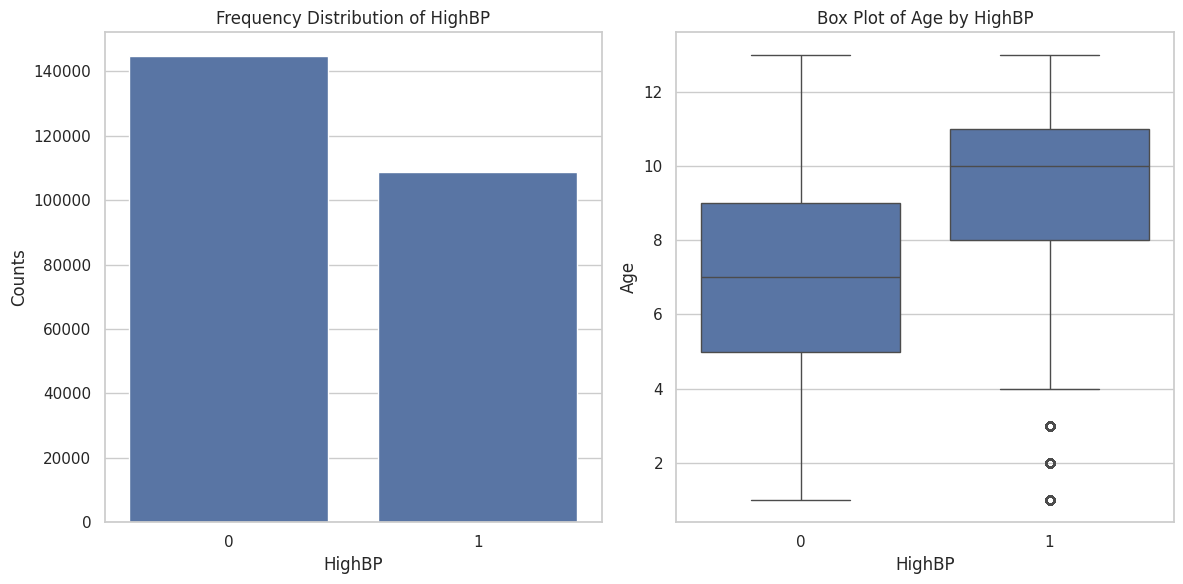

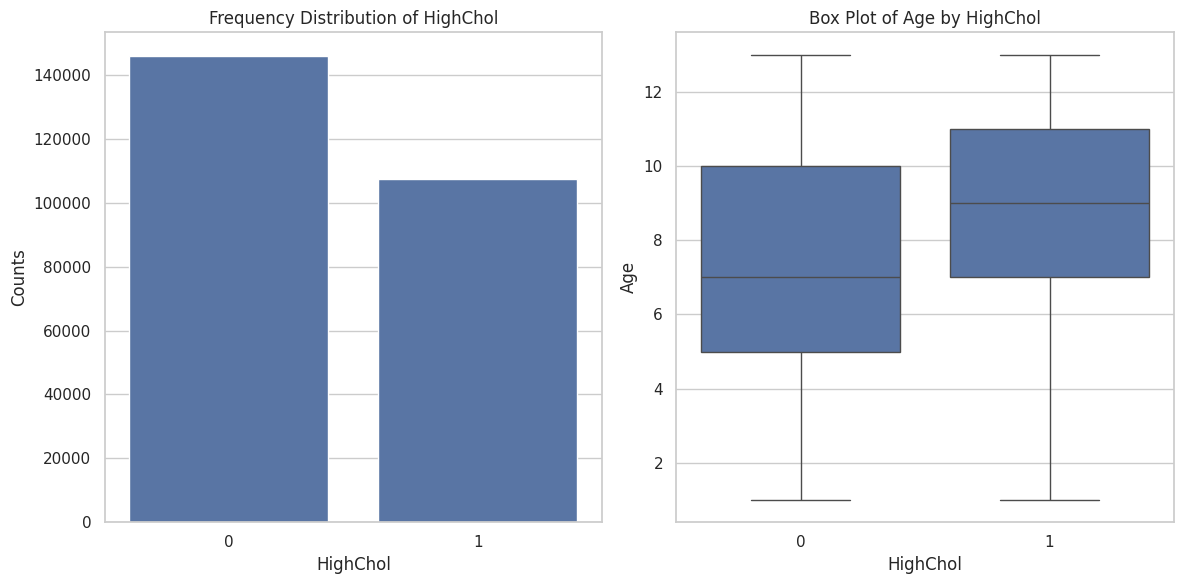

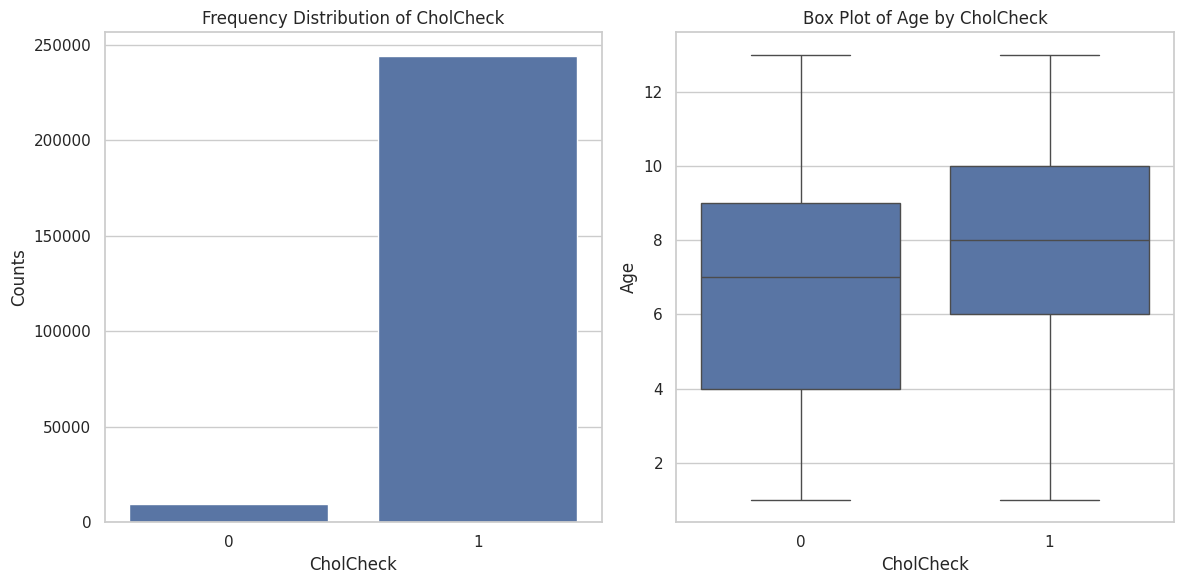

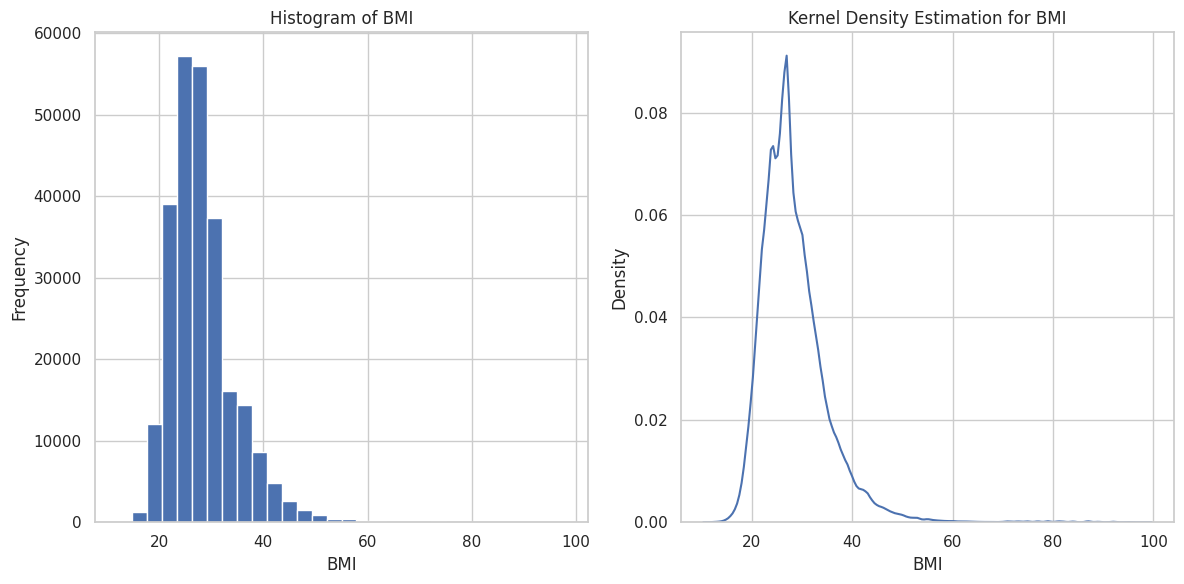

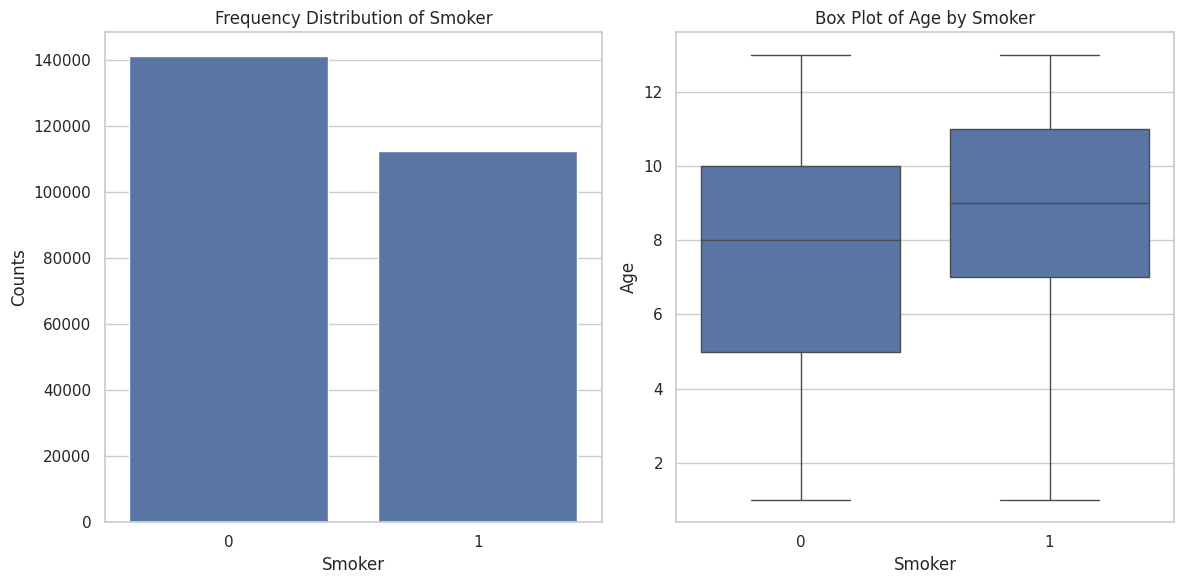

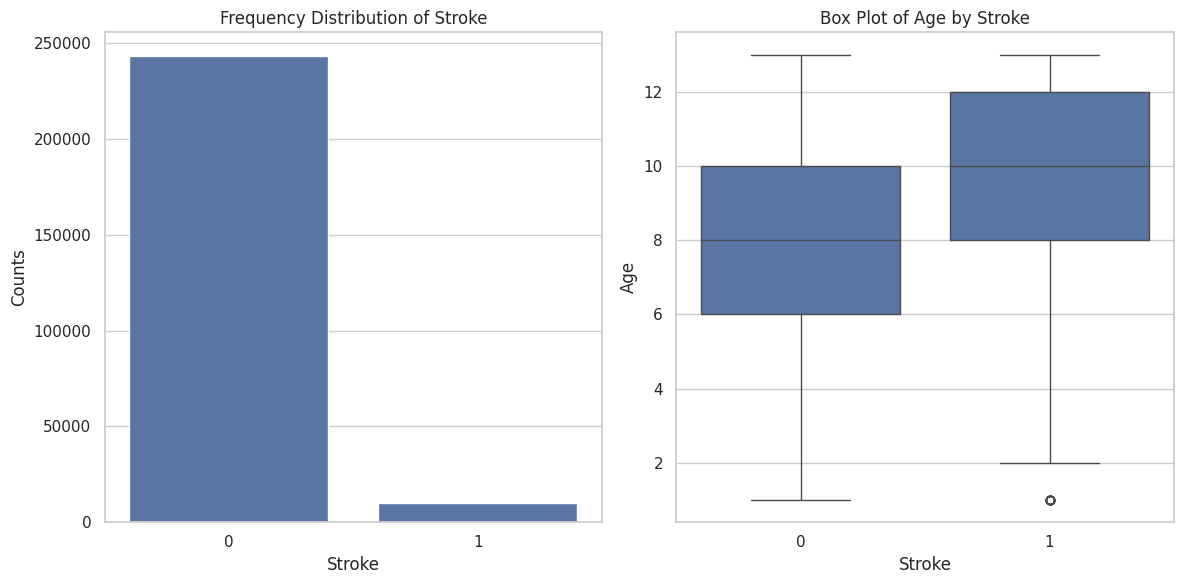

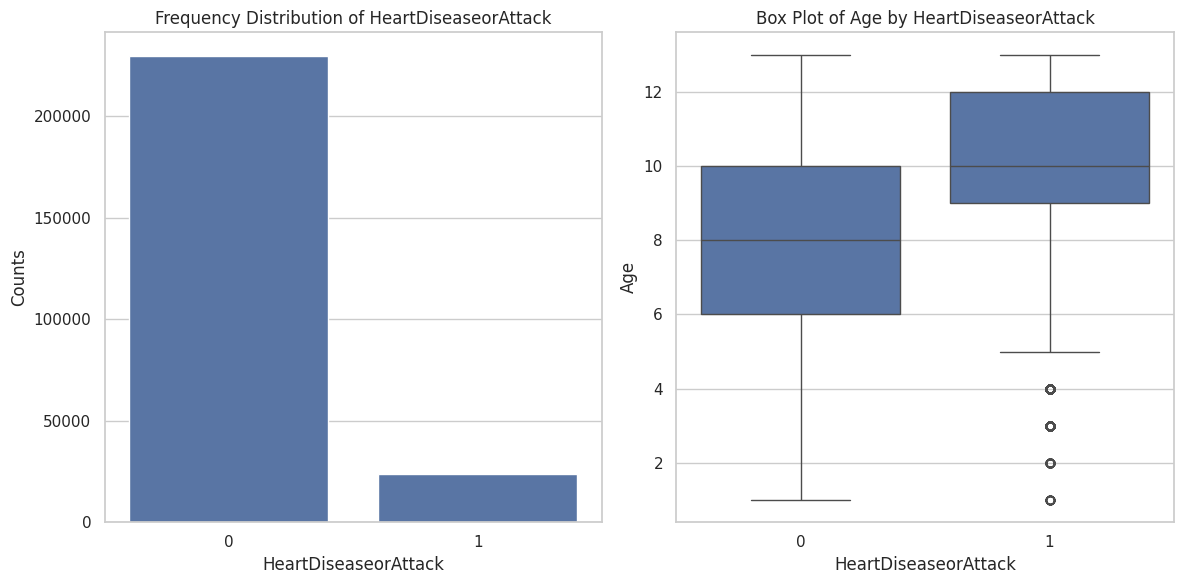

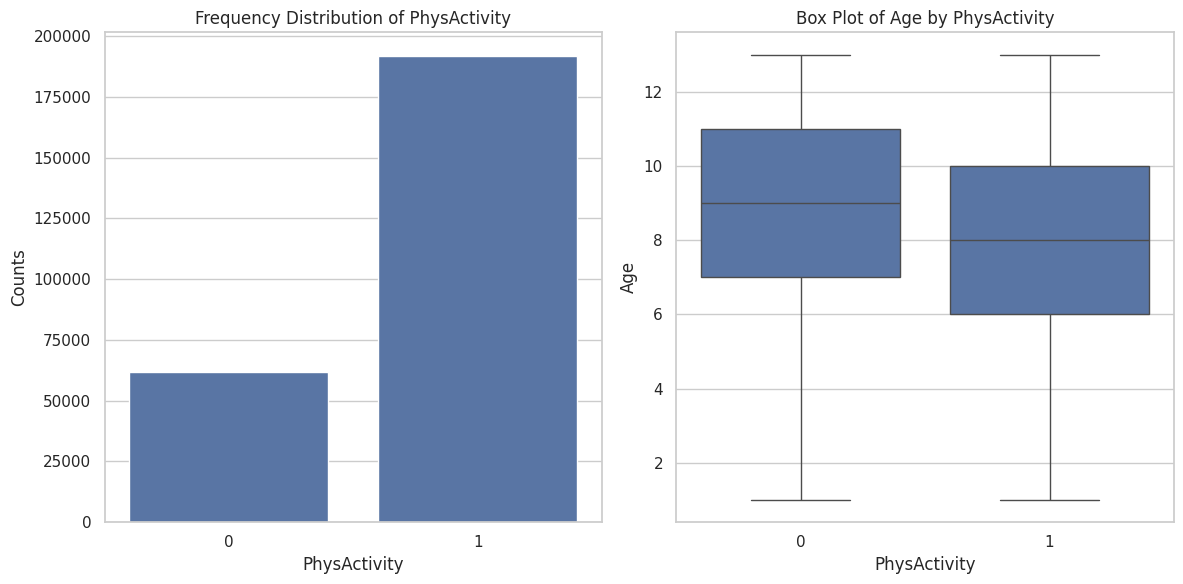

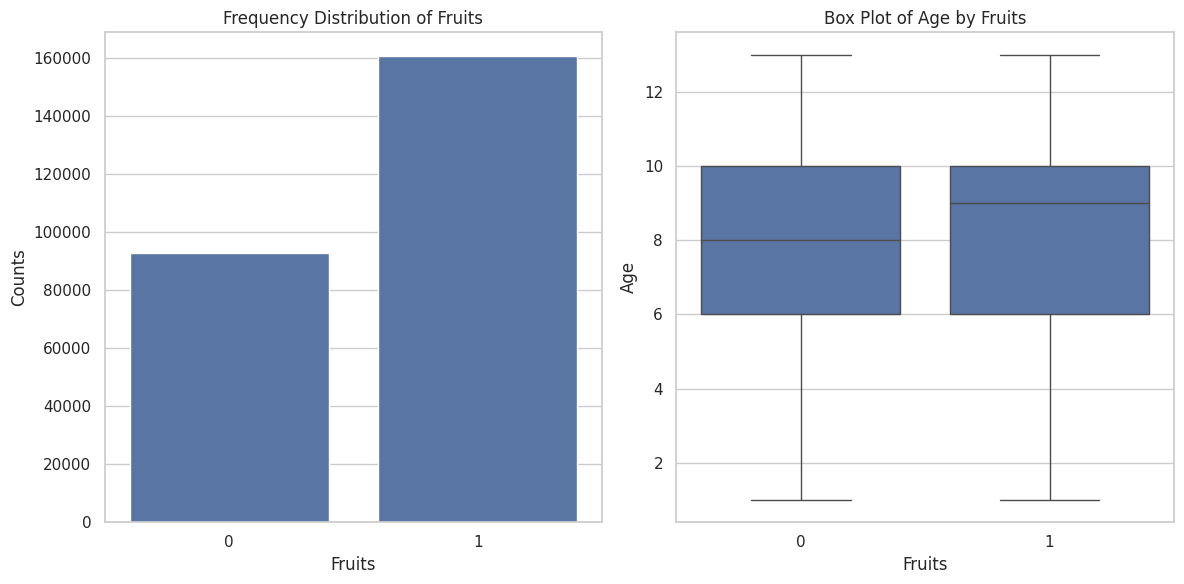

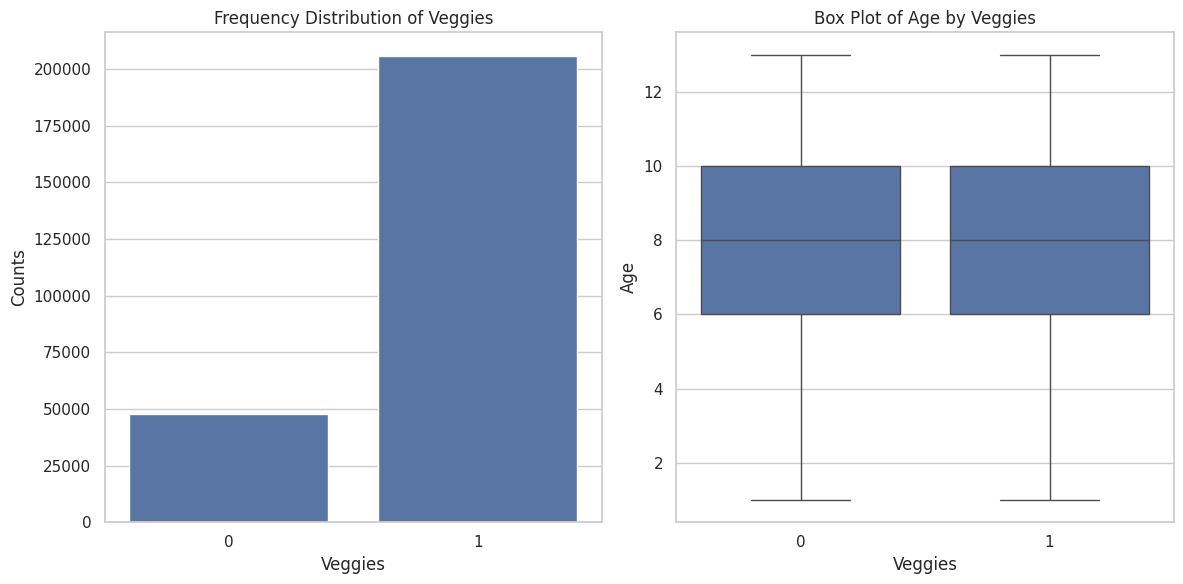

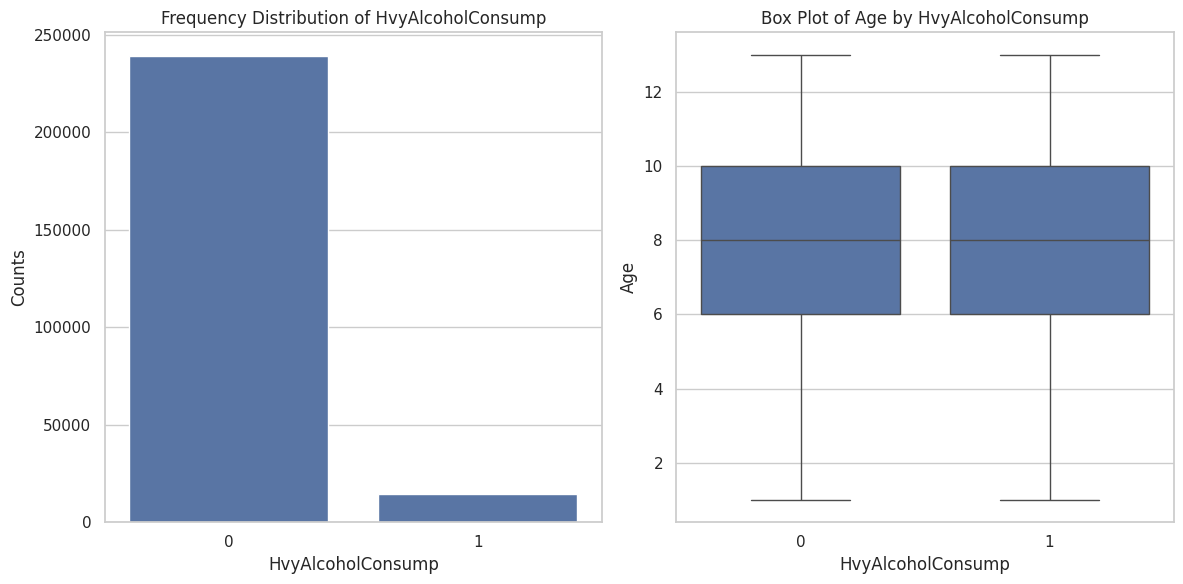

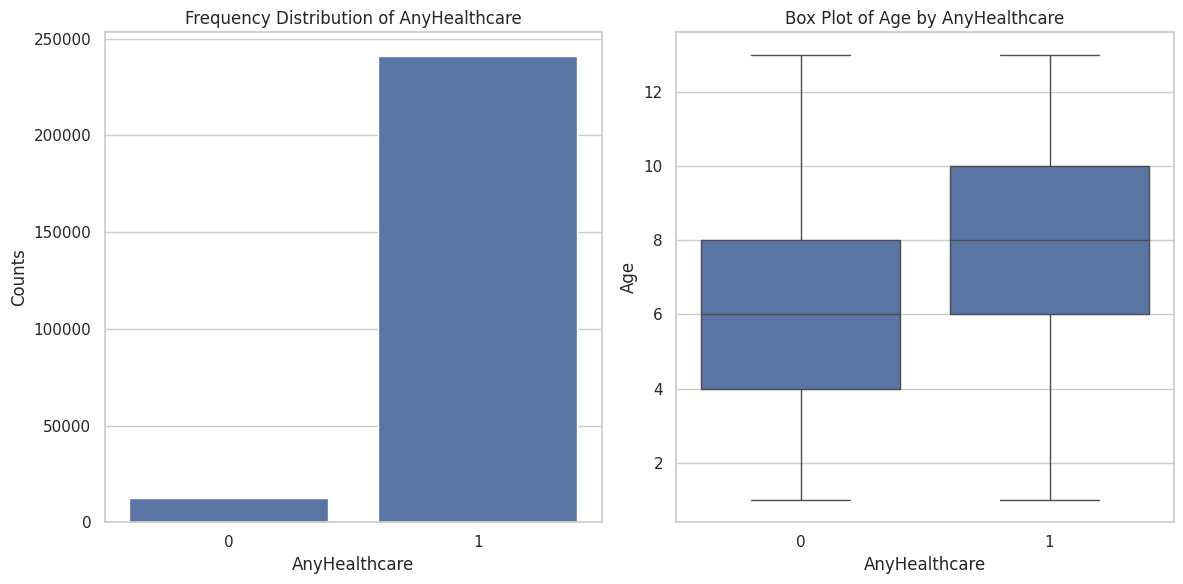

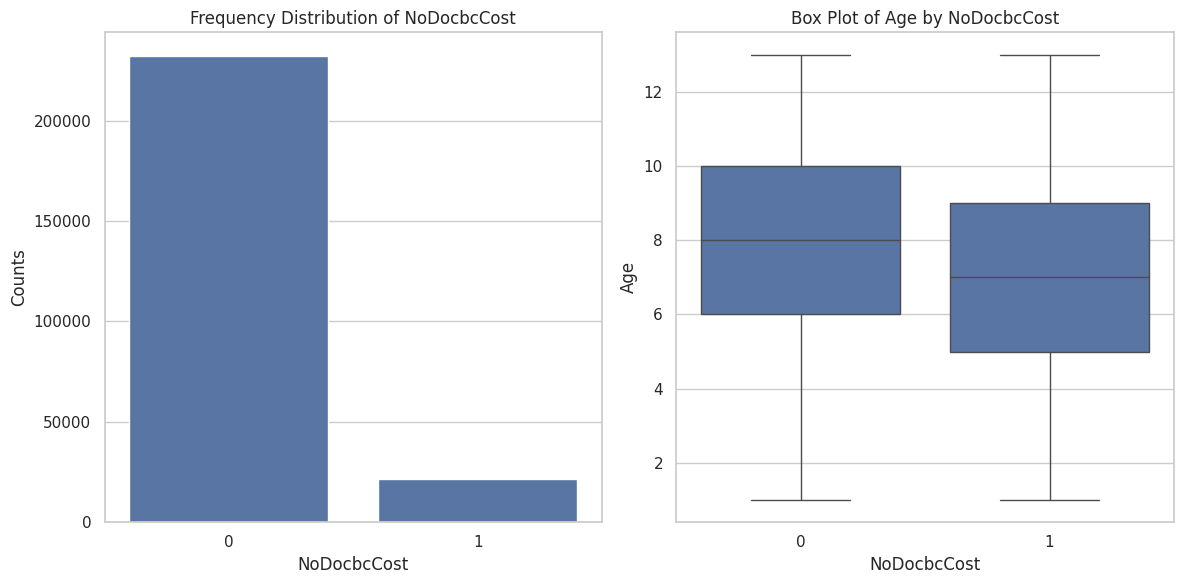

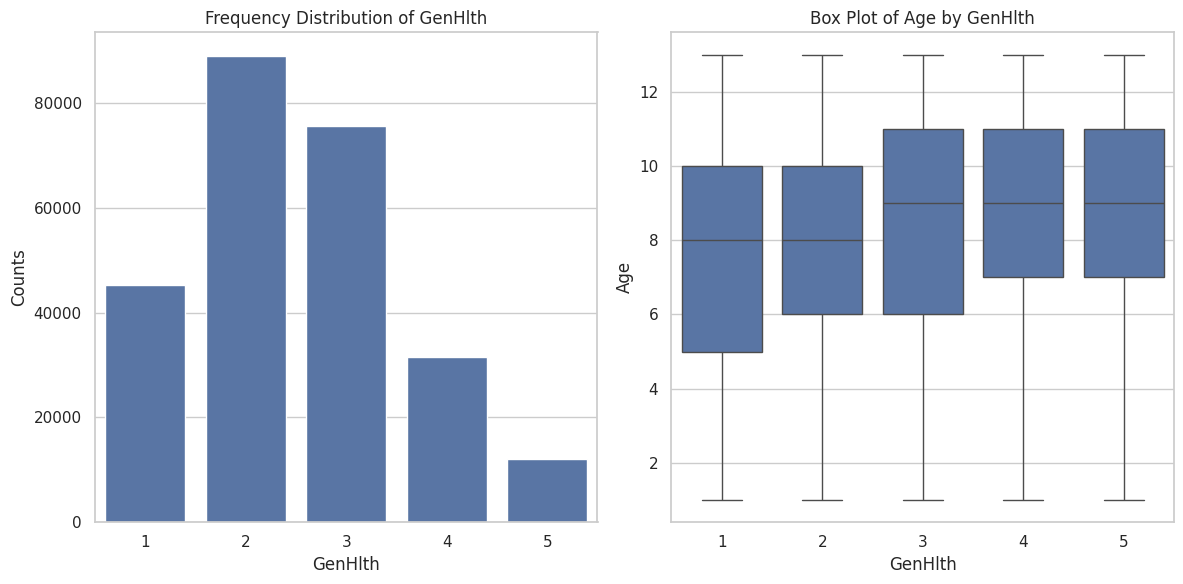

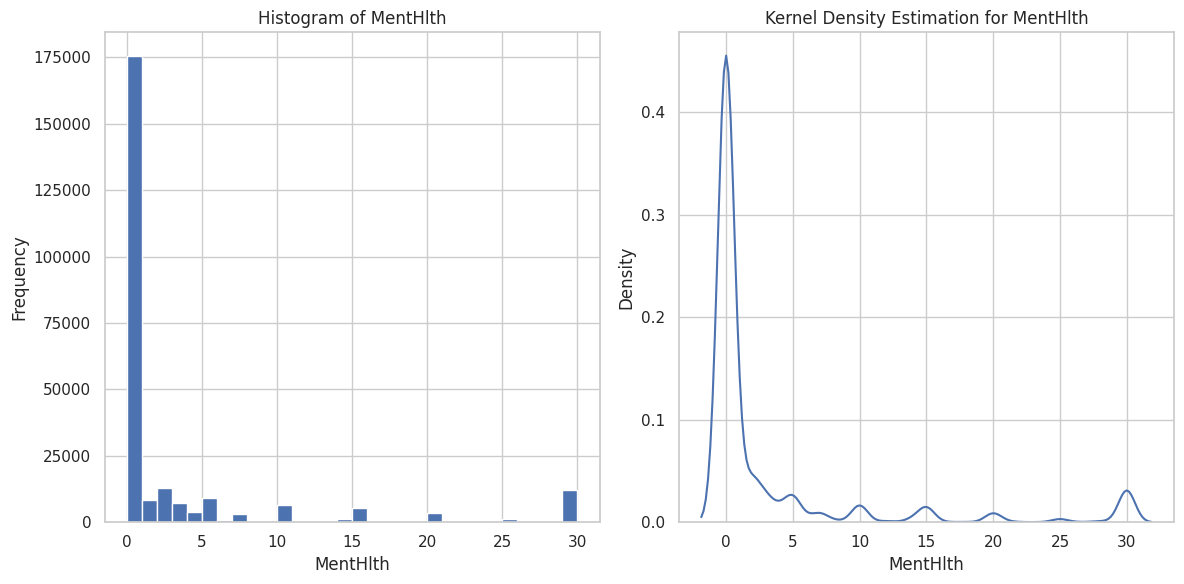

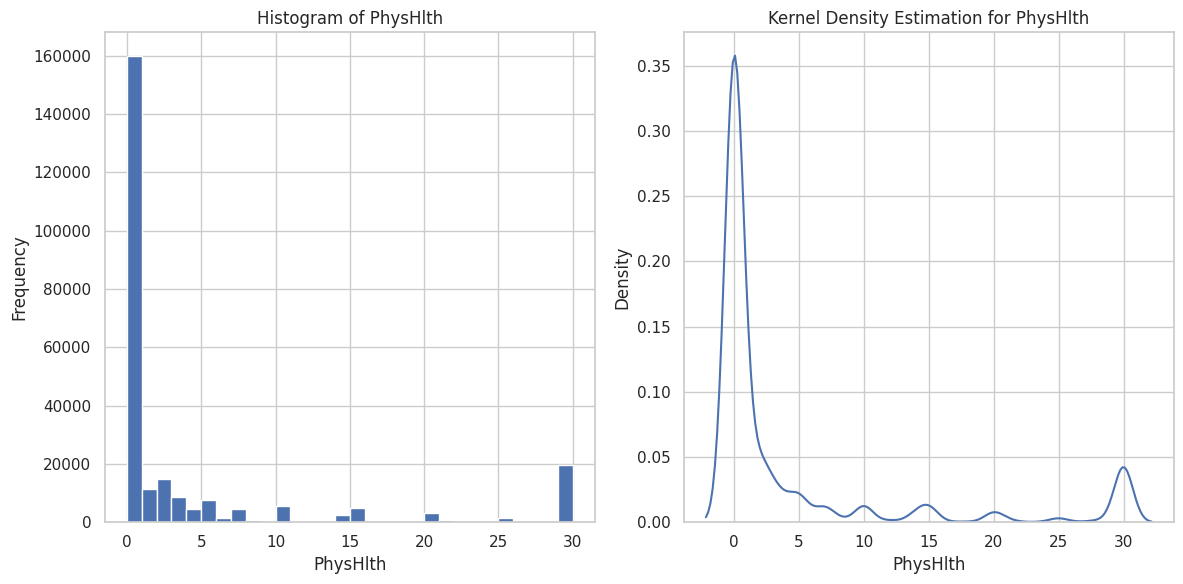

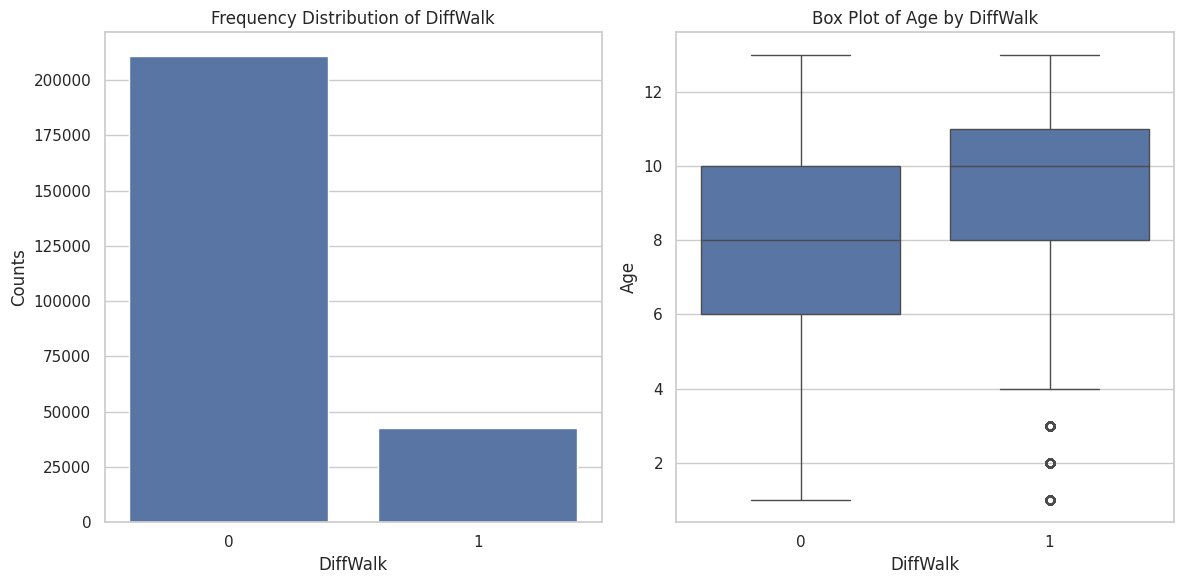

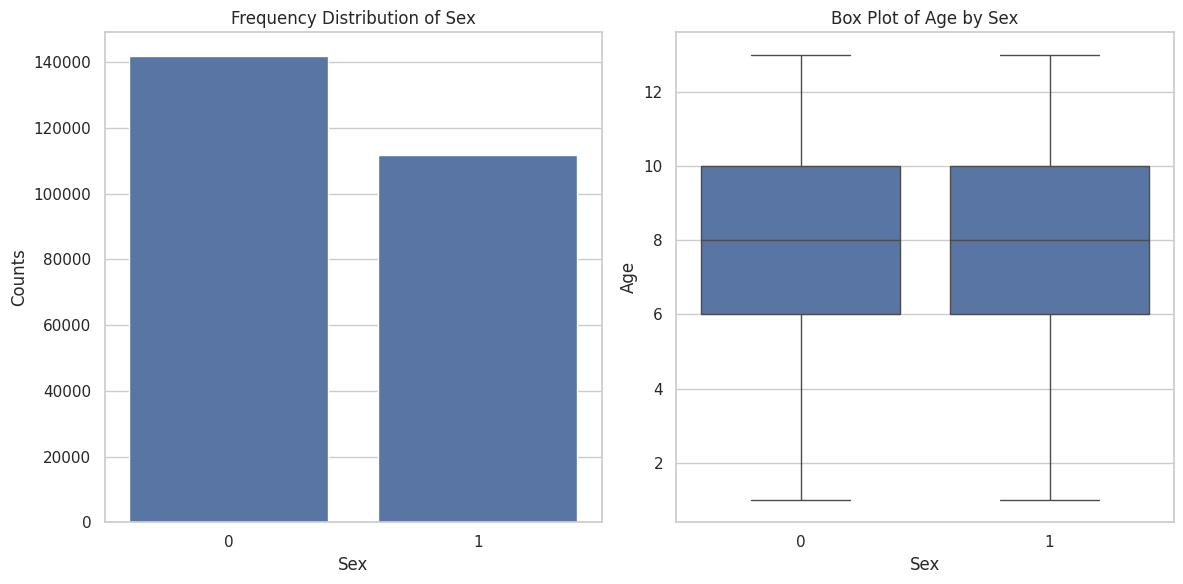

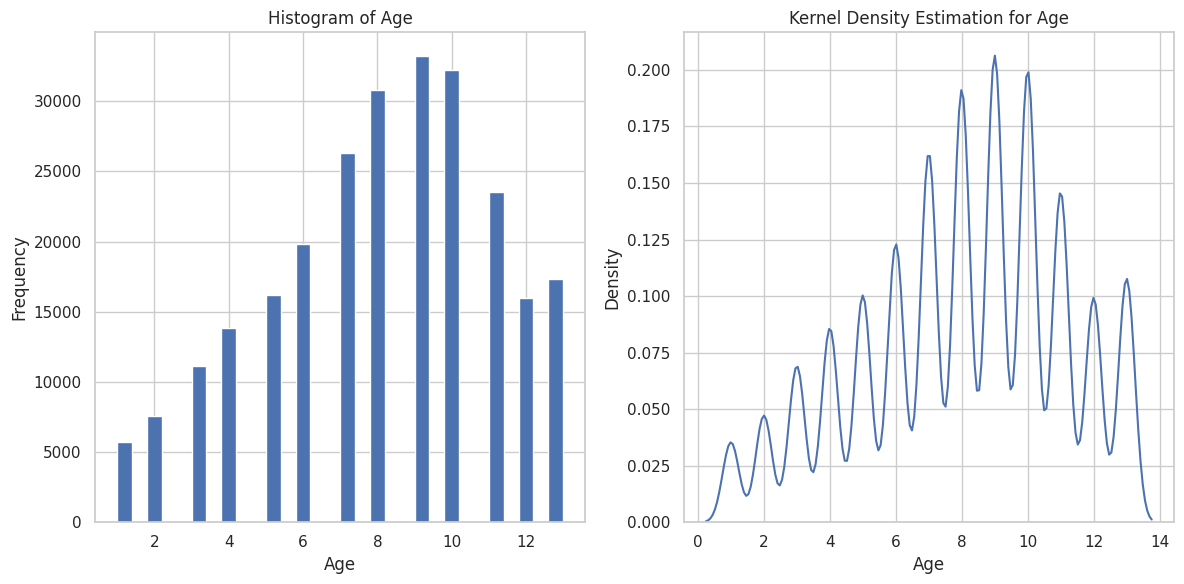

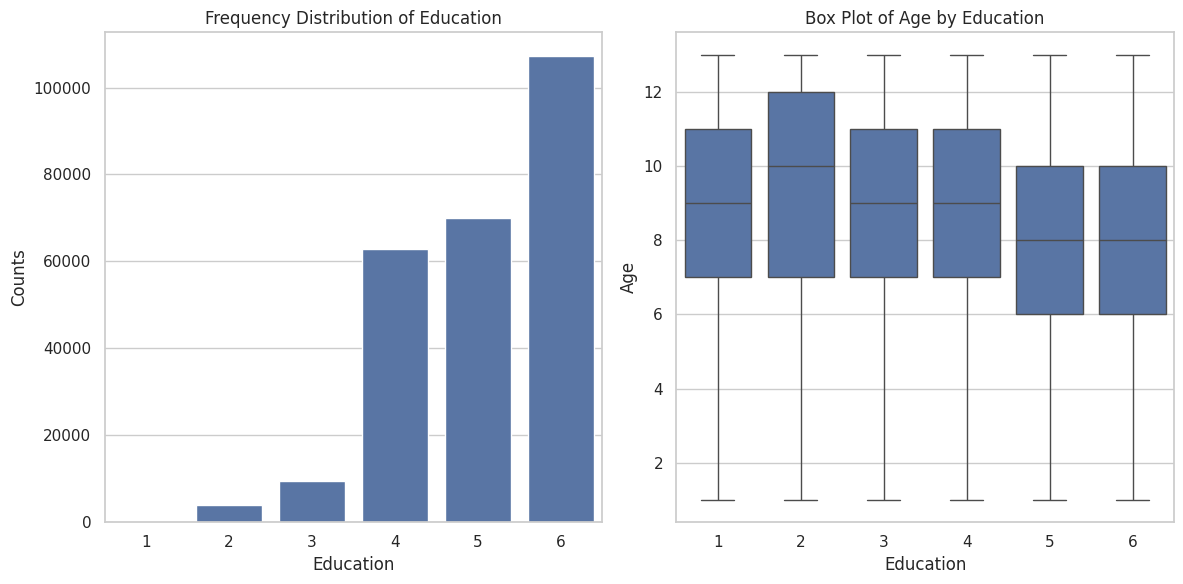

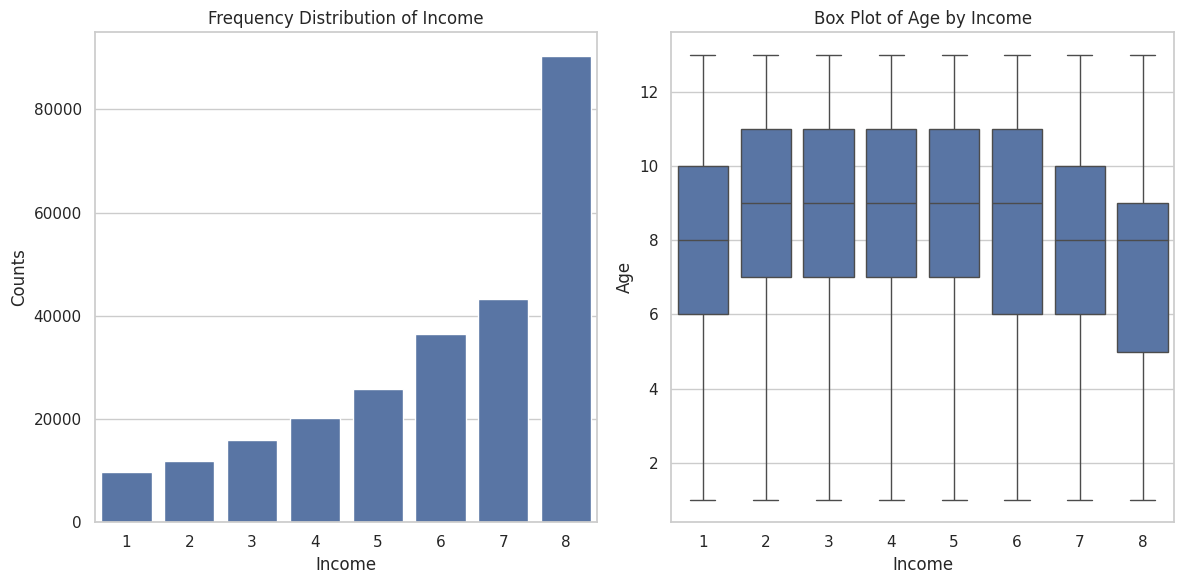

In [10]:
import seaborn as sns

# Setting aesthetics for seaborn plots
sns.set(style="whitegrid")

def plot_data_comparisons(df, column):
    # Check if the column is numeric or categorical
    if df[column].dtype == 'object' or len(df[column].unique()) < 10:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        
        # Frequency Distribution
        sns.countplot(x=column, data=df, ax=ax1)
        ax1.set_title(f'Frequency Distribution of {column}')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Counts')
        
        # Box Plot for each category vs. some continuous variable, adjust 'Age' as needed
        if 'Age' in df.columns:
            sns.boxplot(x=column, y='Age', data=df, ax=ax2)
            ax2.set_title(f'Box Plot of Age by {column}')
            ax2.set_ylabel('Age')
        else:
            ax2.set_title('No Age column found for Box Plot')
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        
        # Histogram
        df[column].hist(bins=30, ax=ax1)
        ax1.set_title(f'Histogram of {column}')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Frequency')
        
        # Kernel Density Estimation
        sns.kdeplot(df[column], ax=ax2)
        ax2.set_title(f'Kernel Density Estimation for {column}')
        ax2.set_xlabel(column)
        ax2.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# List all columns to be plotted, here we assume df.columns is appropriate
for col in X.columns:
    plot_data_comparisons(X, col)
